# Importing Libraries

In [1]:
# Import libraries and read data into dataframe
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_parquet('./zippedData/merged_data.parquet')

# Exploring Genre vs. ROI

In [2]:
# Create dataframe expanded along genres using pd.explode
expanded_genres = df.copy().explode('genres')

### Genre vs. Mean ROI

In [3]:
# Create dataframe grouped by genres with mean ROI, mean product budget, and a count of titles in the genre
groupby_genres_mean = expanded_genres.groupby('genres').agg({'ROI': 'mean',
                                                             'prod_budget': 'mean',
                                                             'title': 'count'})

# Recast title column as int for use in further filtering
groupby_genres_mean.title = groupby_genres_mean.title.astype(int)

# Filter by genres that have at least 75 titles in data set
groupby_genres_mean = groupby_genres_mean.loc[groupby_genres_mean.title >= 75]

# Create a dataframe that represents the top 6 genres by mean ROI
top_6_by_mean = groupby_genres_mean.nlargest(6, 'ROI')

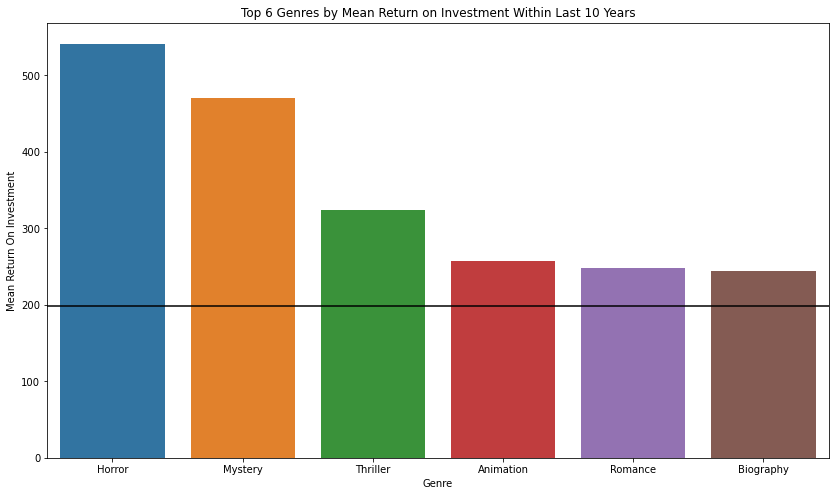

In [4]:
# Create a bar plot representing the top 6 genres by mean ROI created within the last 10 years
# Declare figure and axis objects
fig, ax = plt.subplots(figsize = (14,8))

# Create seaborn barplot, assign to ax
sns.barplot(data = top_6_by_mean,
            x = top_6_by_mean.index,
            y = 'ROI',
            ax = ax);

# Set axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Mean Return On Investment')
ax.set_title('Top 6 Genres by Mean Return on Investment Within Last 10 Years')

# Create a horizontal line representing the mean ROI for all films regardless of genre to compare to whole industry
ax.axhline(y = df.ROI.mean(), c = 'k');

These are the top 6 genres by mean ROI. Using the describe method, Horror and Thriller happen to have a large standard deviation and outliers, making mean a less stable representation of the top genres.

### Genre vs. Median ROI

In [5]:
# Create dataframe grouped by genres with median ROI, median product budget, and a count of titles in the genre
groupby_genres_median = expanded_genres.groupby('genres').agg({'ROI': 'median',
                                                               'prod_budget': 'median',
                                                               'title': 'count'})

# Recast title column as int for use in further filtering
groupby_genres_median.title = groupby_genres_median.title.astype(int)

# Filter by genres that have at least 75 titles in data set
groupby_genres_median_above_75 = groupby_genres_median.copy().loc[groupby_genres_median.title >= 75]

# Create a dataframe that represents the top 6 genres by median ROI
top_6_by_median = groupby_genres_median_above_75.nlargest(6, 'ROI')

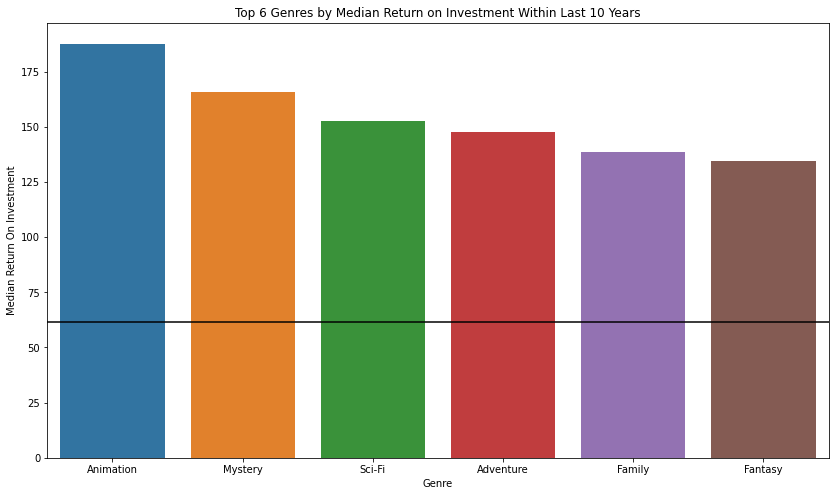

In [6]:
# Create a bar plot representing the top 6 genres by median ROI created within the last 10 years
# Declare figure and axis objects
fig, ax = plt.subplots(figsize = (14,8))

# Create seaborn barplot, assign to ax
sns.barplot(data = top_6_by_median,
            x = top_6_by_median.index,
            y = 'ROI',
            ax = ax);

# Set axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Median Return On Investment')
ax.set_title('Top 6 Genres by Median Return on Investment Within Last 10 Years')

# Create a horizontal line representing the median ROI for all films regardless of genre to compare to whole industry
ax.axhline(y = df.ROI.median(), c = 'k');

These are the top 6 genres by median. Horror and Thriller are no longer on our list, despite being in the top 3 previously. 

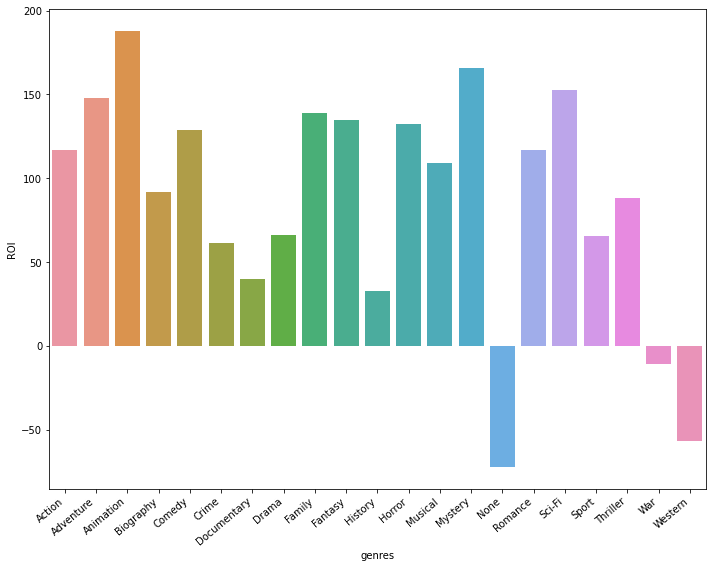

In [7]:
# Create a barplot of all genres by median.
# Declare fig, ax objects
fig, ax = plt.subplots(figsize = (10, 8))

# Create seaborn barplot
sns.barplot(data = groupby_genres_median,
            x = groupby_genres_median.index,
            y = 'ROI',
            estimator = np.median,
            ax = ax)

# Set tick properties
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')

# Set tight layout
plt.tight_layout()

While the median ROI for Horror is still relatively high, the median ROI for thriller is much lower - thriller does not land in the top 10 any more. War and Western films seem to be doing quite poorly in the last 10 years.

### Distribution of ROIs by Genre

In [8]:
# Create a dataframe grouped by genres then ROI, reset index to turn back into a dataframe rather than groupby object
# This allows grouping of data without having to use aggregate functions
groupby_genres_ROI = expanded_genres.groupby(['genres', 'ROI']).first()
groupby_genres_ROI = groupby_genres_ROI.reset_index()

In [9]:
# Declare a set of genres to evaluate (selected from the combined list of top 6 by median and top 6 by mean)
genres_to_evaluate = set(list(top_6_by_mean.index))
for item in list(top_6_by_median.index):
    genres_to_evaluate.add(item)
genres_to_evaluate = list(genres_to_evaluate)

# Create dataframes representing the top genres and the 6 genres by median (less influenced by outliers)
top_genres_raw_ROI = groupby_genres_ROI.loc[groupby_genres_ROI.genres.isin(genres_to_evaluate)]
top_6_genres_by_median_raw_ROI = top_genres_raw_ROI.loc[top_genres_raw_ROI.genres.isin(list(top_6_by_median.index))]

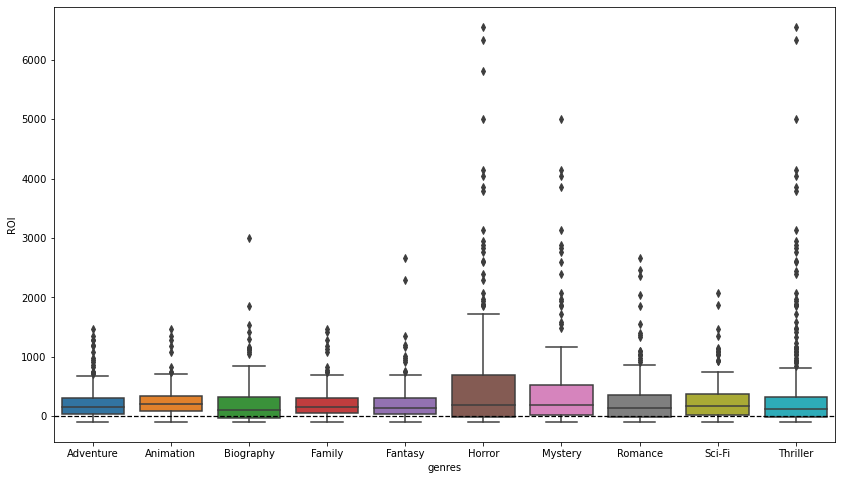

In [10]:
# Create boxplots for each of the top genres
# Declare fig, ax objects
fig, ax = plt.subplots(figsize = (14,8))

# Create seaborn boxplot
sns.boxplot(data = top_genres_raw_ROI,
            x = 'genres',
            y = 'ROI',
            ax = ax);

# Create a horizontal line at ROI = 0 for clarity
ax.axhline(y = 0, linestyle = '--', linewidth = 1.25, c  = 'k');

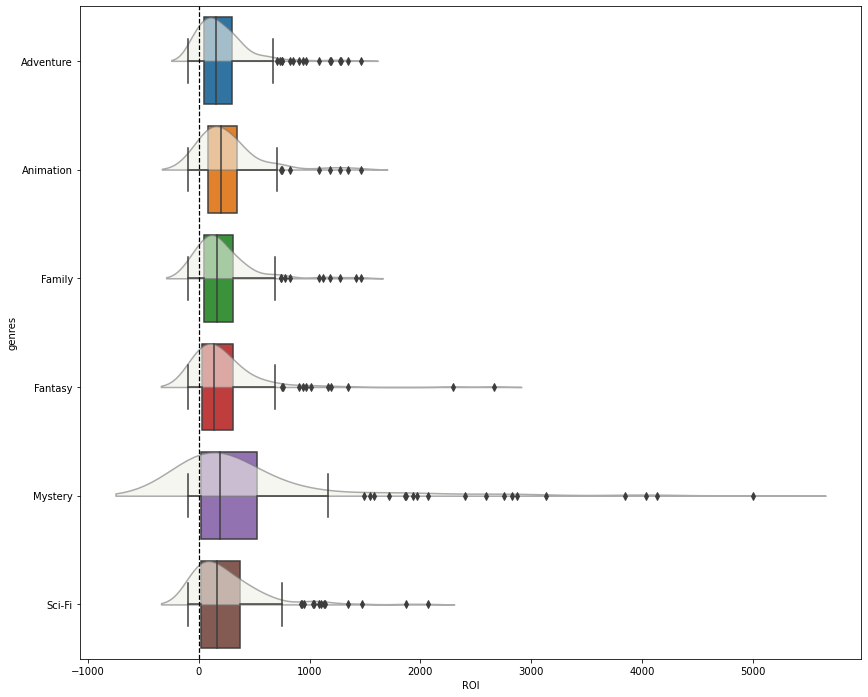

In [11]:
# Create an overlaid boxplot and violinplot for the top 6 genres by median to show distributions
# Declare fig, ax objects
fig, ax = plt.subplots(figsize = (14,12))

# Create seaborn boxplot
sns.boxplot(data = top_6_genres_by_median_raw_ROI,
            y = 'genres',
            x = 'ROI',
            orient = 'h',
            ax = ax);

# Create seaborn violinplot, forcibly creating a half violin by hueing only on true
sns.violinplot(data = top_6_genres_by_median_raw_ROI,
               orient = 'h',
               y = 'genres',
               x = 'ROI',
               inner = 'box',
               hue = True,
               hue_order = [True,False],
               split = True,
               color = '#e7f294',
               ax = ax);

# Suppress legend created due to tricking violinplot to create half violin
ax.legend_ = None

# Set opacity of violinplot to 0.6
plt.setp(ax.collections, alpha = 0.6)

# Create vertical line at ROI = 0 for clarity
ax.axvline(x = 0, c = 'k', linestyle = '--', linewidth = 1.25);


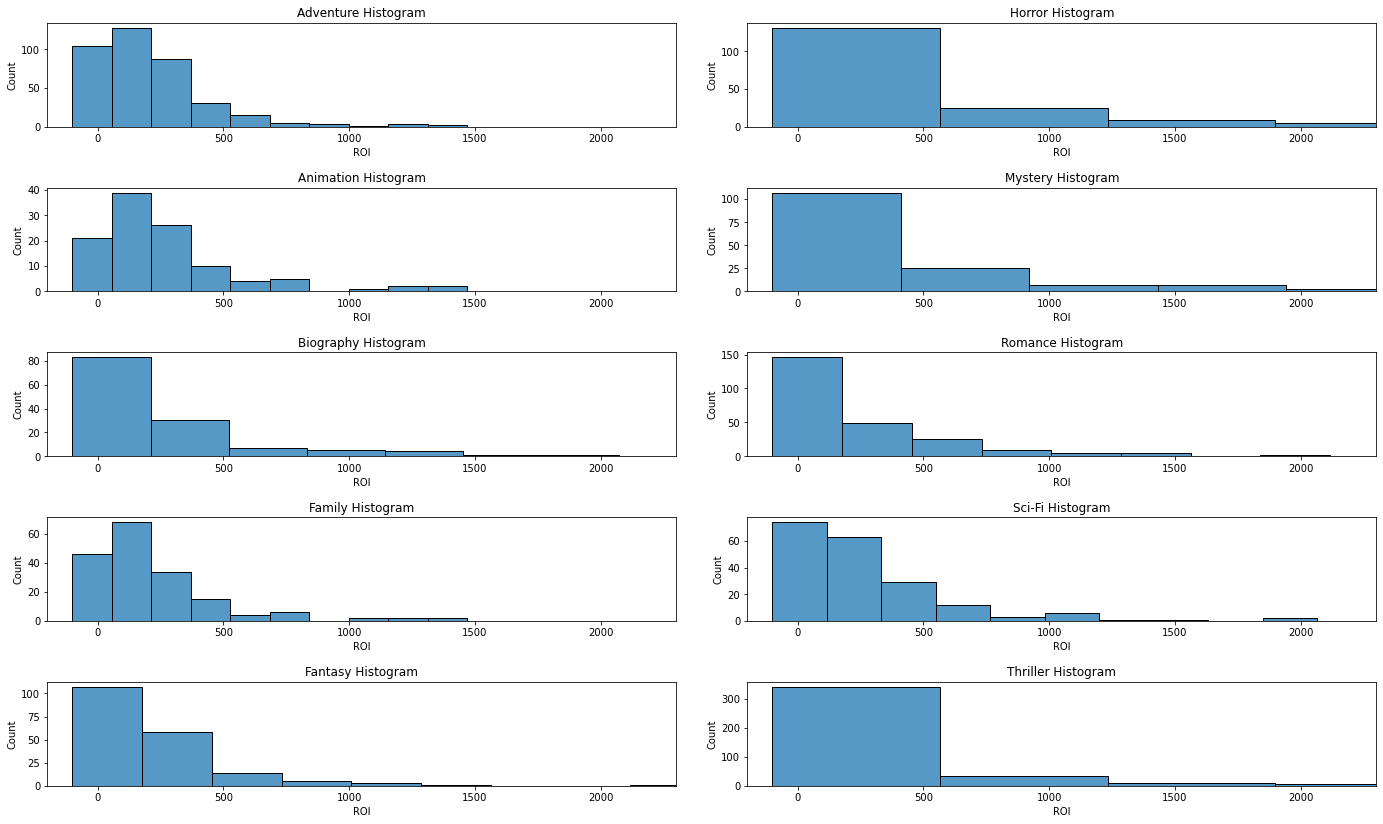

In [12]:
# Create a set of histograms for each of the top genres in one figure
# Declare fig, ax objects
fig, ax = plt.subplots(5,2, figsize = (20,12))

# Set tight layout with padding so labels do not overlap
plt.tight_layout(pad = 4.0)

# For each genre, create a seaborn histplot with 10 bins and correct title labels
for index, genre in enumerate(list(top_genres_raw_ROI.genres.unique())):
    axis = ax[index % 5][index // 5]
    sns.histplot(data = top_genres_raw_ROI,
                 x = top_genres_raw_ROI.loc[top_genres_raw_ROI.genres == genre].ROI,
                 common_norm = False,
                 bins = 10,
                 ax = axis);
    axis.set_xlim([-200, 2300])
    axis.set_title('{} Histogram'.format(genre));

### Exploring Yearly Change in Median ROI by Genre

In [13]:
# Select along a subset of genres
subset_genres = ['Adventure', 'Family', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller','Romance', 'Animation']
expanded_subset_genres = expanded_genres.copy().loc[expanded_genres.genres.isin(subset_genres)]

# Group by years then genres, aggregate by median
median_ROI_subset = expanded_subset_genres.groupby(['year','genres']).ROI.median().reset_index()

# Group by year select ROI
ROI_by_year = median_ROI_subset.groupby('year').ROI.median()

In [14]:
# Create a plotly line figure
fig = go.Figure()
fig = px.line(median_ROI_subset,
              x = 'year',
              y = 'ROI',
              color = 'genres')

fig.update_xaxes(dtick = 1, range = [2009, 2020])
fig.update_yaxes(range = [-50, 560])
fig.add_trace(px.line(x = median_ROI_subset.year,
                      y = median_ROI_subset.ROI,
                      color = median_ROI_subset.genres).data[0])

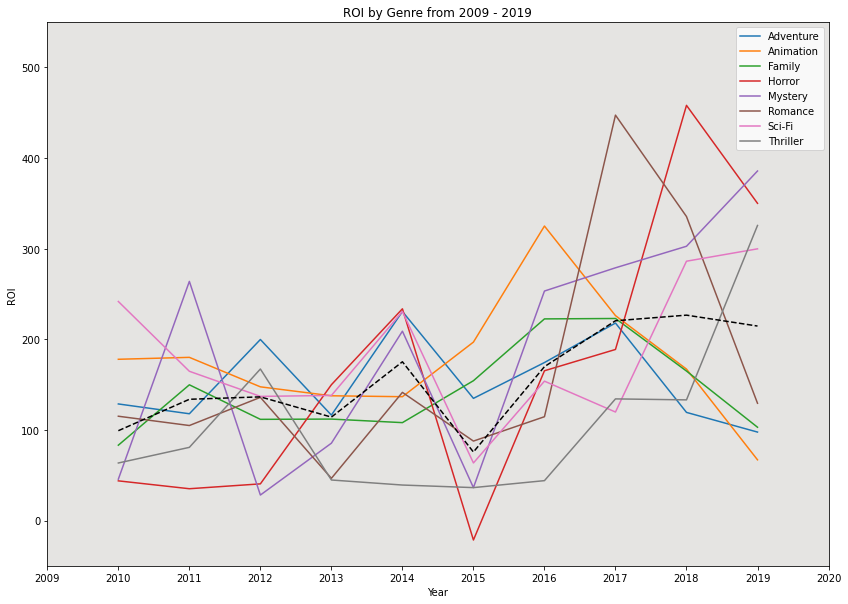

In [15]:
# Create the same plot as above using seaborn instead of plotly to add median ROI over time line for all genres
# Declare fig, ax objects
fig, ax = plt.subplots(figsize = (14,10))

# Plot median ROI over time for each genre
sns.lineplot(data = median_ROI_subset,
             x = 'year',
             y = 'ROI',
             hue = 'genres')

# Plot median ROI over time for all genres
sns.lineplot(x = ROI_by_year.index,
             y = ROI_by_year.values,
             color = 'black',
             linestyle = 'dashed')

# Set boundary properties
ax.set_xlim([2009,2020])
ax.set_ylim([-50,550])

# Set axis labels and title
ax.set_title('ROI by Genre from 2009 - 2019')
ax.set_xlabel('Year')

# Set tick and background properties
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_facecolor('#E5E4E2')

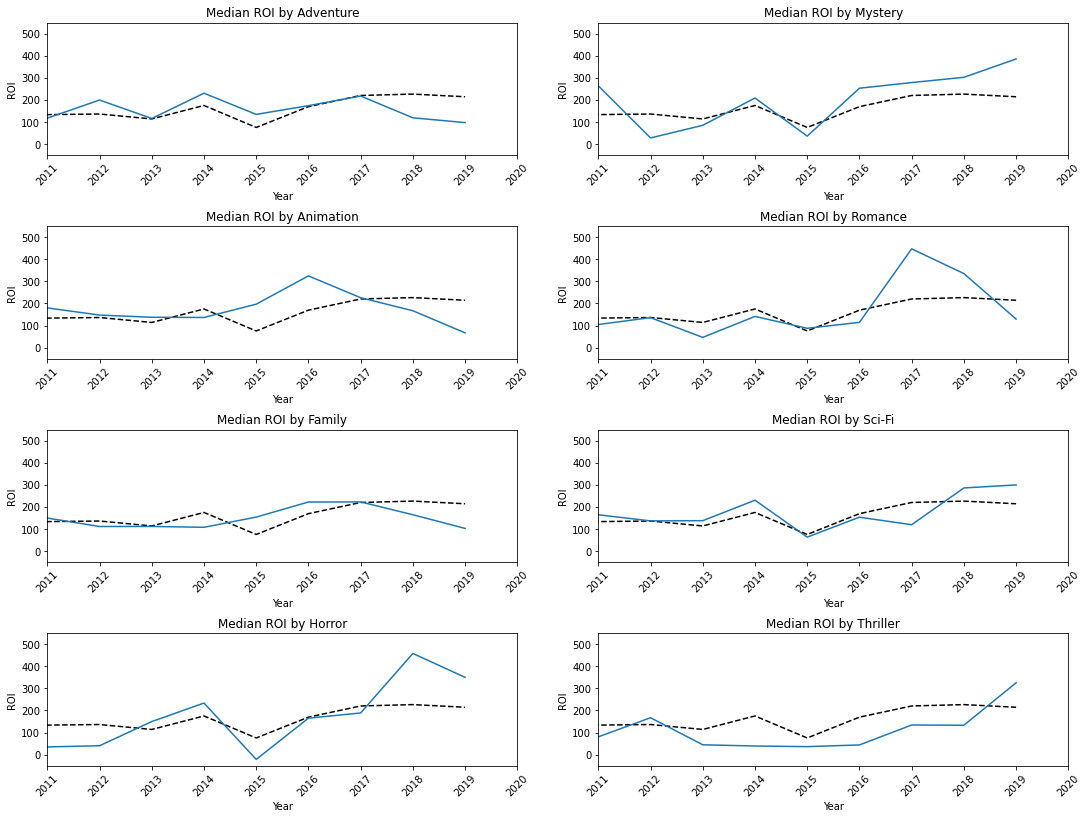

In [16]:
# Create line plots of change in median ROI by genre, same as above but split into subplots

# Declare fig, ax objects, 4 by 2 subplots for 8 categories
fig, ax = plt.subplots(4,2,figsize = (16,12))

# Declare tight layout
plt.tight_layout(pad = 5.0)

# For each genre, create a line plot that represents that genre's change in median ROI over time
# Also, create a dotted line that represents median ROI over time for all genres
for index, genre in enumerate(list(median_ROI_subset.genres.unique())):
    # Select axis
    axis = ax[index % 4][index // 4]
    
    # Plot median ROI over time for all genres
    sns.lineplot(x = ROI_by_year.index,
                 y = ROI_by_year.values,
                 color = 'black',
                 linestyle = '--',
                 ax = axis)
    
    # Plot median ROI over time for genre
    sns.lineplot(data = median_ROI_subset,
                 x = 'year',
                 y = median_ROI_subset.loc[median_ROI_subset.genres == genre].ROI,
                 ax = axis)
    
    # Set boundary properties
    axis.set_xlim([2011,2020])
    axis.set_ylim([-50,550])
    
    # Set axis labels and titles
    axis.set_xlabel('Year')
    axis.set_title(f'Median ROI by {genre}')
    
    # Set tick properties
    axis.xaxis.set_major_locator(plt.MultipleLocator(1))
    for tick in axis.get_xticklabels():
        tick.set_rotation(45)

# Exploring Directors and Writers vs. ROI

In [17]:
# Explode expanded_genres by director
expanded_director = expanded_genres.copy().explode('director')

# Explode expanded_genres by writer
expanded_writer = expanded_genres.copy().explode('writer')

### Director by Median ROI

In [18]:
# Grab the top 25 directors by highest median ROI
grouped_median_by_director = expanded_director.copy().groupby('director').median().nlargest(25, 'ROI').reset_index()

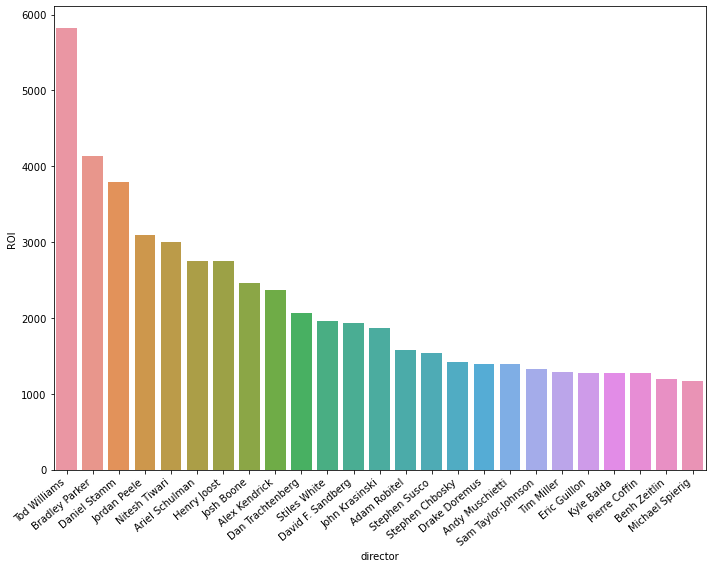

In [19]:
# Create a bar plot of director by median ROI for movies they have worked on
# Declare fig, ax objects
fig, ax = plt.subplots(figsize = (10, 8))

# Create seaborn barplot
sns.barplot(data = grouped_median_by_director,
            x = 'director',
            y = 'ROI',
            estimator = np.median,
            ax = ax);

# Set tick properties
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')

# Set tight layout
plt.tight_layout()

### Top Directors Across Top 6 Genres by Normalized ROI

In [20]:
# Slice expanded_director by genres in the top 6 genres by median ROI
expanded_director_top_genres = expanded_director.loc[expanded_director.genres.isin(list(top_6_by_median.index))]

# Sort by genres, director, ROI for further processing, drop unnecessary columns
expanded_director_top_genres = expanded_director_top_genres.sort_values(['genres', 'director', 'ROI'])
expanded_director_top_genres = expanded_director_top_genres[['genres', 'director','title', 'ROI']]

# Create empty series to populate
ROI_normed_series_directors = pd.Series(dtype = 'float64')

# For each genre, select the mean ROI, and then apply normalization function to ROI row
# Append data to ROI_normed_series_directors to build new column
for genre in sorted(list(expanded_director_top_genres.genres.unique())):
    frame_slice = expanded_director_top_genres.loc[expanded_director_top_genres.genres == genre] 
    genre_mean = frame_slice.ROI.mean()
    temp_series = frame_slice.ROI.apply(lambda x: (x - genre_mean)/(genre_mean))
    ROI_normed_series_directors = pd.concat([ROI_normed_series_directors, temp_series])

# Create new column named 'ROI_normed' using built series
expanded_director_top_genres['ROI_normed'] = ROI_normed_series_directors

# Create empty dataframe to populate
top_5_directors_top_genres = pd.DataFrame()

# For each genre, select the top 5 directors by ROI_normed for the genre
# Append data to top_5_directors_top_genres
for genre in sorted(list(expanded_director_top_genres.genres.unique())):
    frame_slice = expanded_director_top_genres.loc[expanded_director_top_genres.genres == genre]
    temp_frame = frame_slice.groupby('director').agg({'ROI_normed': 'mean',
                                                      'genres': 'first'}).nlargest(5, 'ROI_normed')
    top_5_directors_top_genres = pd.concat([top_5_directors_top_genres, temp_frame])
    
# Select the top 15 directors out of top 5 directors for each genre
top_15_directors = top_5_directors_top_genres.reset_index().nlargest(15, 'ROI_normed')

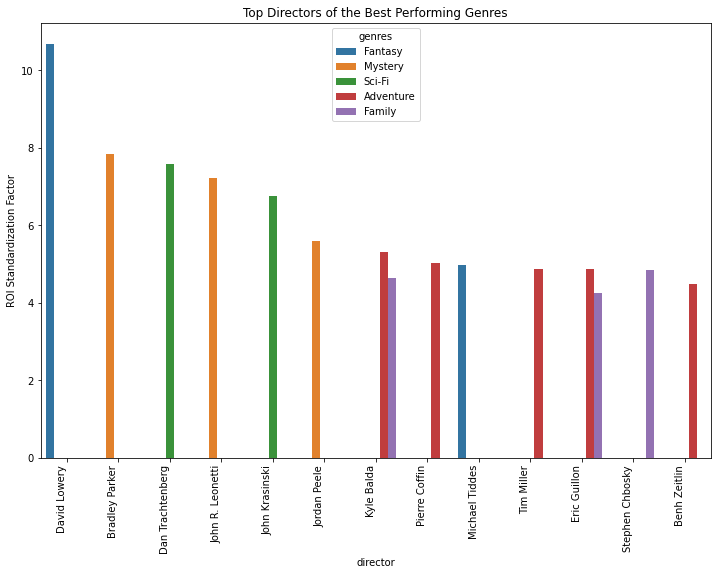

In [21]:
# Create a bar plot of top directors by ROI_normed hued by genre
# Declare fig, ax object
fig, ax = plt.subplots(figsize = (12,8))

# Create seaborn barplot
sns.barplot(data = top_15_directors,
            x = 'director',
            y = 'ROI_normed',
            hue = 'genres');

# Set axis labels and title
ax.set_title('Top Directors of the Best Performing Genres')
ax.set_ylabel('ROI Standardization Factor');

# Set tick properties
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right');


### Writer by Median ROI

In [22]:
# Grab the top 25 writers by highest median ROI
grouped_median_by_writer = expanded_writer.copy().groupby('writer').median().nlargest(25,'ROI').reset_index()

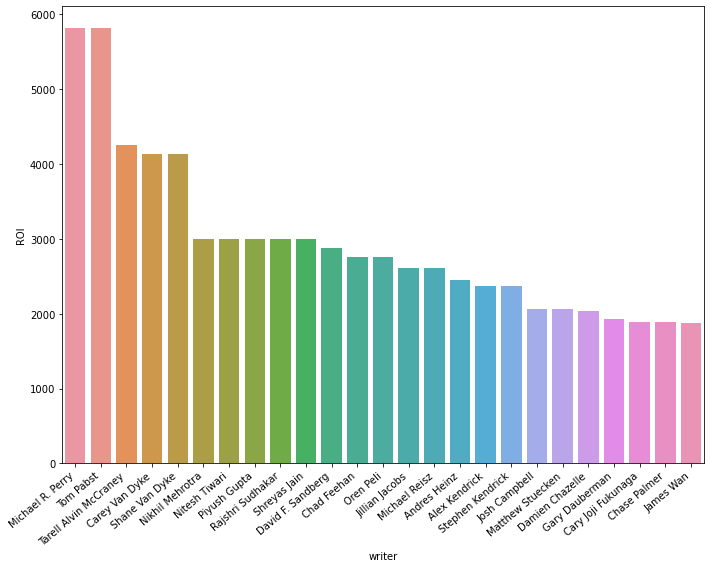

In [23]:
# Create a bar plot of writer by median ROI for movies they have worked on
# Declare fig, ax objects
fig,ax = plt.subplots(figsize = (10, 8))

# Create seaborn barplot
sns.barplot(data = grouped_median_by_writer,
            x = 'writer',
            y = 'ROI',
            estimator = np.median,
            ax = ax)

# Set tick properties
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right');

# Set tight layout
plt.tight_layout()

### Top Writers Across Top 6 Genres by Normalized ROI

In [24]:
# Slice expanded_writer by genres in the top 6 genres by median ROI
expanded_writer_top_genres = expanded_writer.loc[expanded_writer.genres.isin(list(top_6_by_median.index))]

# Sort by genres, writer, ROI for further processing, drop unnecessary columns
expanded_writer_top_genres = expanded_writer_top_genres.sort_values(['genres', 'writer', 'ROI'])
expanded_writer_top_genres = expanded_writer_top_genres[['genres', 'writer','title', 'ROI']]

# Create empty series to populate
ROI_normed_series_writers = pd.Series(dtype = 'float64')

# For each genre, select the mean ROI, and then apply normalization function to ROI row
# Append data to ROI_normed_series_writers to build new column
for genre in sorted(list(expanded_writer_top_genres.genres.unique())):
    frame_slice = expanded_writer_top_genres.loc[expanded_writer_top_genres.genres == genre] 
    genre_mean = frame_slice.ROI.mean()
    temp_series = frame_slice.ROI.apply(lambda x: (x - genre_mean)/(genre_mean))
    ROI_normed_series_writers = pd.concat([ROI_normed_series_writers, temp_series])

# Create new column named 'ROI_normed' using built series
expanded_writer_top_genres['ROI_normed'] = ROI_normed_series_writers

# Create empty dataframe to populate
top_5_writers_top_genres = pd.DataFrame()

# For each genre, select the top 5 writers by ROI_normed for the genre
# Append data to top_5_writers_top_genres
for genre in sorted(list(expanded_writer_top_genres.genres.unique())):
    frame_slice = expanded_writer_top_genres.loc[expanded_writer_top_genres.genres == genre]
    temp_frame = frame_slice.groupby('writer').agg({'ROI_normed': 'mean',
                                                    'genres': 'first'}).nlargest(5, 'ROI_normed')
    top_5_writers_top_genres = pd.concat([top_5_writers_top_genres, temp_frame])
    
# Select the top 15 writers out of top 5 writers for each genre
top_15_writers = top_5_writers_top_genres.reset_index().nlargest(15, 'ROI_normed')

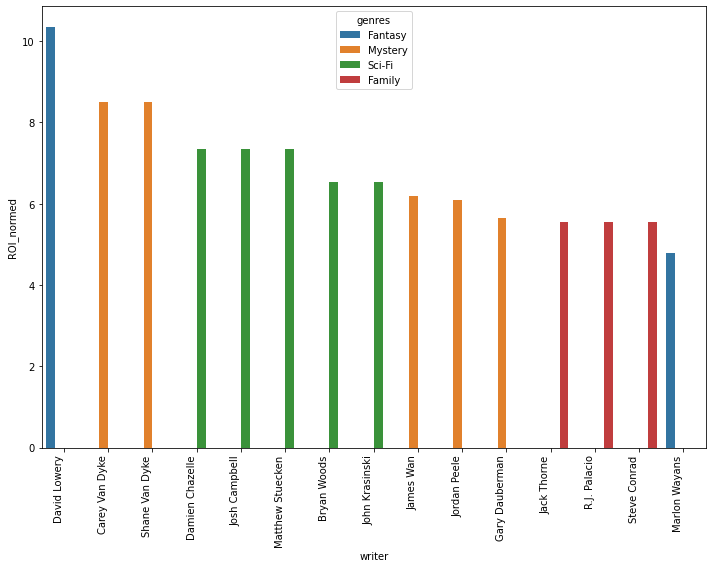

In [25]:
# Create a bar plot of top directors by ROI_normed hued by genre
# Declare fig, ax object
fig, ax = plt.subplots(figsize = (10,8))

# Create seaborn barplot
sns.barplot(data = top_15_writers,
            x = 'writer',
            y = 'ROI_normed',
            hue = 'genres',
            ax = ax)

# Set tick properties
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right');

# Set tight layout
plt.tight_layout()

# Exploring Runtime vs. ROI

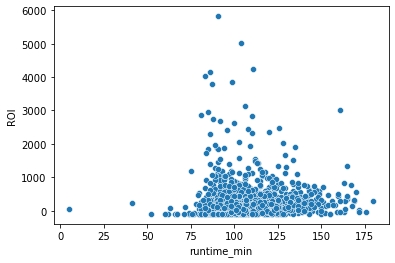

In [26]:
# Create seaborn scatterplot of runtime_min vs. ROI
# Not much semblance of correlation - if you are between ~90 and ~135 minutes (which is almost every movie), you make money
# Runtimes are all pretty close, the spread is not significant enough to try to separate into categorical 'bins'
sns.scatterplot(data = df, x = 'runtime_min', y = 'ROI');